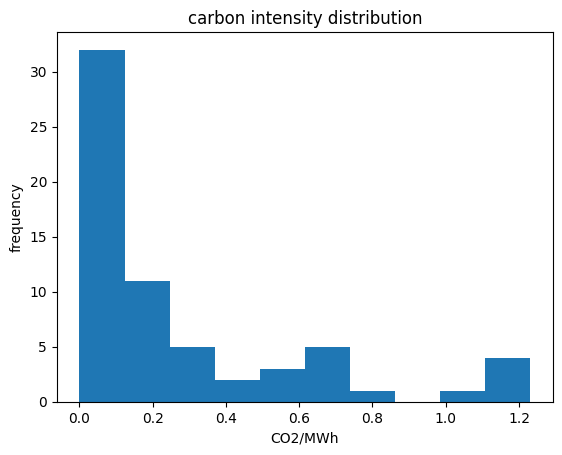

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming result_df is already loaded
result_df = pd.read_csv("Result/201906/0617_all_10.csv")

# Create a new column for carb_total
result_df['carb_total'] = result_df['carb_inten_no_renew'] * result_df['pd']

# Get the unique counties and create a new DataFrame
county_df = pd.DataFrame(sorted(result_df['county'].unique()), columns=['county'])

# Group by 'county' and sum 'carb_total' and 'pd', then merge results into county_df
grouped = result_df.groupby('county').agg(
    carb_total=('carb_total', 'sum'),
    pd_total=('pd', 'sum')
).reset_index()

# Merge the aggregated values back into the county_df
county_df = county_df.merge(grouped, on='county', how='left')
county_df['carb_inten'] = county_df.carb_total/county_df.pd_total
res = county_df.carb_inten.to_numpy()
plt.hist(res)
plt.title("carbon intensity distribution")
plt.xlabel("CO2/MWh")
plt.ylabel("frequency")
plt.show() 

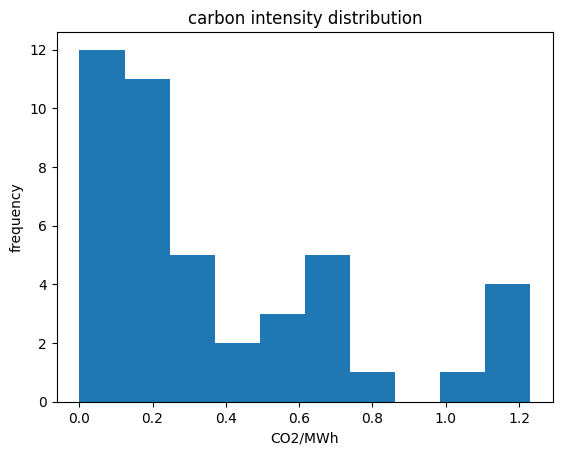

In [20]:
res = res[res != 0]
plt.hist(res)
plt.title("carbon intensity distribution without zero emission counties")
plt.xlabel("metric tonnes CO2/MWh")
plt.ylabel("frequency")
plt.show() 

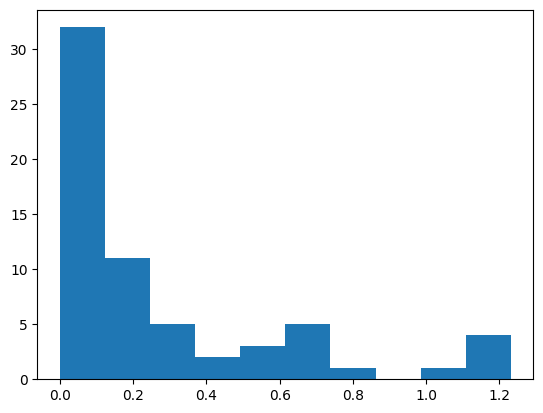

In [13]:
plt.hist(res)
plt.show() 